## plot results of MVLR

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### read excel

In [29]:
data = pd.read_excel('MVLRresults.xlsx', sheet_name=1, header=0, index_col=0)
print(data)
print(data.index)

             R2    MAE  OOSMAE
None      0.900  0.165   0.201
SPE       0.884  0.190   0.238
ForceRMS  0.895  0.161   0.194
ForceMax  0.835  0.223   0.316
ELUMO     0.899  0.163   0.202
Gap       0.900  0.161   0.201
charge1   0.893  0.158   0.187
charge2   0.899  0.162   0.204
charge4   0.896  0.174   0.208
charge8   0.868  0.193   0.236
charge9   0.890  0.164   0.202
charge11  0.866  0.171   0.201
charge12  0.894  0.170   0.225
charge13  0.899  0.161   0.208
Index(['None', 'SPE', 'ForceRMS', 'ForceMax', 'ELUMO', 'Gap', 'charge1',
       'charge2', 'charge4', 'charge8', 'charge9', 'charge11', 'charge12',
       'charge13'],
      dtype='object')


In [12]:
plot1 = sns.barplot(x=data.index, y=data.MAE,data.R2)

# plot1.set_xticklabels(labels = ['{: >10}'.format(l) for l in data.index], rotation = 60)
plot1.set_xlabel('Feature group')
plot1.set_ylabel('OOS MAE (kcal/mol)')
#plot1.set_xlim(0.8,1)
# for i in range(len(data.index)):
#     plot1.text(data.OOSMAE[i], i, data.OOSMAE[i], ha='left', color='black', va='center')

AttributeError: 'bool' object has no attribute 'all'

matplotlib

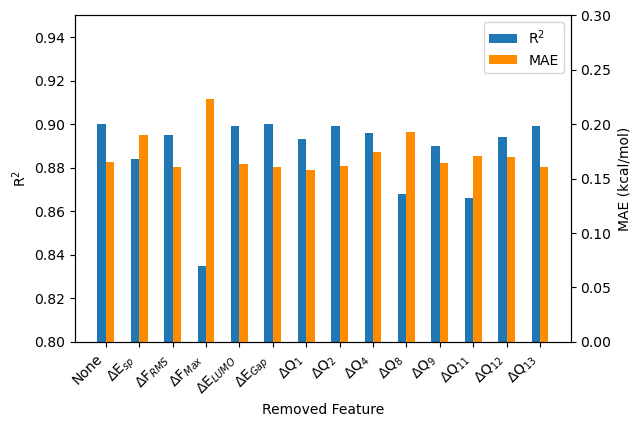

In [31]:
x = np.arange(len(data.index))
width = 0.25
fig = plt.figure()

ax1 = fig.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel('Removed Feature')
ax1.set_ylabel(u'R$^{2}$')
ax1.set_ylim(0.8,0.95)
ax2.set_ylabel('MAE (kcal/mol)')
ax2.set_ylim(0,0.3)

bar1 = ax1.bar(x - width/2, data.R2, width, label=u'R$^{2}$')
bar2 = ax2.bar(x + width/2, data.MAE, width, label='MAE', fc='darkorange')

xlabels = ['None', 'ΔE$_{sp}$', 'ΔF$_{RMS}$', 'ΔF$_{Max}$', 'ΔE$_{LUMO}$', 'ΔE$_{Gap}$',
           'ΔQ$_{1}$', 'ΔQ$_{2}$', 'ΔQ$_{4}$', 'ΔQ$_{8}$', 'ΔQ$_{9}$', 'ΔQ$_{11}$', 'ΔQ$_{12}$', 'ΔQ$_{13}$']
plt.xticks(x, labels=xlabels)
# plt.xticks(x, labels=data.index)
# ax1labels = ax1.get_xticklabels()
# ax1labels[4].set_fontweight('bold')
# for i in [1,3,7,9,11,12]:
#     ax1labels[i].set_fontweight('bold')

fig.autofmt_xdate(rotation=45)
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

### save pic

In [32]:
file_path = 'pics/featureselection-R2MAE.png'
figure1 = fig.get_figure()
figure1.savefig(file_path, dpi=1000, bbox_inches='tight')